# Health and Academic Success

In [271]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [272]:
bay_counties = ['Alameda', 'Contra Costa', 'Marin', 'Napa', 'San Francisco', 'San Mateo', 'Santa Clara', 'Solano', 'Sonoma']

## The Data

This data gives the percent of students in the grades 5, 7 or 9 that are physically fit per county in California. There is a section that splits per gender and entries that comprise all students. I chose this data file because it gives an estimate on physical fitness while the other does not.

In [273]:
fit_students = pd.read_csv('/Users/megan/Documents/HealthAndSuccess/data/percentage-of-physically-fit-students-lghc-indicator-8.csv')
fit_students

,LGHC Indicator Name,Year,Strata,Strata Name,Geography,Grade Lev,Numerator,Denominator,Percent,LCI,UCI,Stardard Error,RSE,warning
0,score 6 of 6,1998-1999,None,All Students,Alameda,Grade 5,2711.0,12808.0,21.17,20.46,21.88,0.36,1.70,NaN
1,score 6 of 6,1998-1999,None,All Students,Alameda,Grade 7,2549.0,11493.0,22.18,21.42,22.94,0.39,1.76,NaN
2,score 6 of 6,1998-1999,None,All Students,Alameda,Grade 9,1986.0,10105.0,19.65,18.87,20.43,0.40,2.04,NaN
3,score 6 of 6,1998-1999,None,All Students,Amador,Grade 5,28.0,319.0,8.78,5.68,11.88,1.58,18.00,NaN
4,score 6 of 6,1998-1999,None,All Students,Amador,Grade 7,5.0,356.0,1.40,0.18,2.62,0.62,44.29,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37231,score 6 of 6,2018-2019,Sex,Male,Yolo,Grade 7,310.0,1202.0,25.79,23.32,28.26,1.26,4.89,NaN
37232,score 6 of 6,2018-2019,Sex,Male,Yolo,Grade 9,380.0,1075.0,35.35,32.49,38.21,1.46,4.13,NaN
37233,score 6 of 6,2018-2019,Sex,Male,Yuba,Grade 5,174.0,584.0,29.79,26.09,33.49,1.89,6.34,NaN
37234,score 6 of 6,2018-2019,Sex,Male,Yuba,Grade 7,166.0,548.0,30.29,26.45,34.13,1.96,6.47,NaN


Health index of schools in California. Includes data on various different aspects. I chose this data file because it gives many different indicators for health.

In [274]:
health_index = pd.read_csv('/Users/megan/Documents/HealthAndSuccess/data/Sheet 1_data.tsv', sep='\t')
health_index

,Latitude,Longitude,Totalenrollment,Asthmaer Rate,Bipoc Over90,Ca Av Asthmaer Rate,Ca Av Chronicabsenteeismrate,Ca Av Diabetes Crudeprev,Ca Av Hosp Mentalhealth,Ca Av Hpi Index,...,Percentfrpl Quartile,Percentfrpl,Percenthomeless,Percentnonwhite,School,Schools In County,Schools In District,Suspensionratetotal,Urban,vehicle_access
0,34.033860,-118.18582,14965,56.8,1.0,54.599998,32.099998,10.4,4.7,47.900002,...,6,75.900001526,0.699999988,90.900001526,City of Angels,2005,938,0,urban,12.0
1,38.609400,-121.34676,6696,61.1,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,4,50.700000763,3.200000048,49.900001526,Visions In Education,346,69,0,urban,2.3
2,34.261787,-118.52343,5675,27.9,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,4,50.700000763,0.300000012,72.300003052,Granada Hills Charter,2005,938,0.3,urban,6.1
3,36.753917,-119.78923,4733,110.8,1.0,54.599998,32.099998,10.4,4.7,47.900002,...,8,91.599998474,0.300000012,92.5,J. E. Young Academic Center,290,103,0.4,urban,14.5
4,33.954072,-117.56779,4580,31.8,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,4,58,0.200000003,83.099998474,Eleanor Roosevelt High,454,50,2.8,urban,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,39.534341,-123.45338,101,44.3,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,6,66.300003052,0,21.100000381,Sherwood,37,7,0,rural,5.8
8575,33.347369,-117.23808,100,24.7,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,6,82,1,87.300003052,Ivy High (Continuation),670,2,2.7,urban,0.8
8576,34.299866,-118.83203,100,29.7,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,2,11,0,36.900001526,The High School at Moorpark College,187,10,3.9,urban,3.3
8577,34.643112,-120.45905,100,49.6,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,6,75,7,74.5,Mission Valley,100,16,0,urban,12.2


Graduation rates per year from the 2017-2018 school year to 2021-2022 school year in California.

In [275]:
grad_rate_17_18 = pd.read_csv("/Users/megan/Documents/HealthAndSuccess/data/fycgr18.txt", sep="\t")
grad_rate_17_18

,ReportingYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterSchool,DASS,...,Seal of Biliteracy (Count),Seal of Biliteracy (Rate),Golden State Seal Merit Diploma (Count),Golden State Seal Merit Diploma (Rate,Non-Graduate Completers (Count),Non-Graduate Completers (Rate),Transfers (Count),Transfers (Rate),Dropout (Count),Dropout (Rate)
0,2017-18,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,989,13.6,1928,26.5,80,1.0,62,0.8,615,7.6
1,2017-18,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,599,8.1,1567,21.1,103,1.2,89,1.0,1076,12.4
2,2017-18,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,685,19.9,1570,45.7,26,0.7,22,0.6,150,4.1
3,2017-18,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,30,1.8,112,6.8,30,1.4,22,1.1,384,18.4
4,2017-18,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,1,2.6,4,10.3,1,1.6,5,8.1,17,27.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196857,2017-18,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,0,0.0,1,0.3,4,0.4,42,4.4,589,62.4
196858,2017-18,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,0,0.0,10,1.0,46,1.3,212,6.0,2242,63.2
196859,2017-18,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,1,1.2,1,1.2,2,1.0,12,6.3,93,48.4
196860,2017-18,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,16,0.2,49,0.7,306,1.4,1294,6.0,12640,58.9


In [276]:
grad_rate_18_19 = pd.read_csv("/Users/megan/Documents/HealthAndSuccess/data/fycgr19.txt", sep="\t")
grad_rate_18_19

,ReportingYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterSchool,DASS,...,Seal of Biliteracy (Count),Seal of Biliteracy (Rate),Golden State Seal Merit Diploma (Count),Golden State Seal Merit Diploma (Rate,Non-Graduate Completers (Count),Non-Graduate Completers (Rate),Transfers (Count),Transfers (Rate),Dropout (Count),Dropout (Rate)
0,2018-19,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,1365,17.4,2353,30.0,102,1.2,66,0.8,528,6.2
1,2018-19,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,841,10.8,1913,24.5,152,1.7,88,1.0,919,10.3
2,2018-19,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,1066,26.6,2057,51.3,66,1.6,16,0.4,110,2.6
3,2018-19,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,41,2.5,90,5.5,37,1.9,10,0.5,282,14.4
4,2018-19,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,3,5.5,5,9.1,0,0.0,3,4.0,17,22.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198491,2018-19,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,1,0.3,4,1.1,8,0.7,61,5.6,672,61.6
198492,2018-19,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,1,0.1,11,1.1,52,1.5,176,5.0,2323,65.6
198493,2018-19,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,0,0.0,0,0.0,5,2.8,11,6.1,94,52.2
198494,2018-19,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,25,0.3,117,1.5,344,1.5,1184,5.1,13949,60.2


In [278]:
grad_rate_19_20 = pd.read_csv("/Users/megan/Documents/HealthAndSuccess/data/fycgr20.txt", sep="\t")
grad_rate_19_20

,ReportingYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterSchool,DASS,...,Seal of Biliteracy (Count),Seal of Biliteracy (Rate),Golden State Seal Merit Diploma (Count),Golden State Seal Merit Diploma (Rate,Non-Graduate Completers (Count),Non-Graduate Completers (Rate),Transfers (Count),Transfers (Rate),Dropout (Count),Dropout (Rate)
0,2019-20,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,1207,15.8,2363,30.9,96,1.2,66,0.8,490,5.9
1,2019-20,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,833,10.7,2010,25.7,164,1.8,105,1.2,927,10.3
2,2019-20,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,884,23.0,2022,52.5,48,1.2,8,0.2,97,2.4
3,2019-20,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,34,2.1,110,6.7,38,2.0,21,1.1,240,12.4
4,2019-20,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,5,4.1,12,9.9,2,1.3,1,0.6,30,19.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254594,2019-20,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,0,0.0,2,0.5,5,0.5,43,4.0,661,61.4
254595,2019-20,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,0,0.0,13,1.1,41,1.1,153,4.2,2308,62.9
254596,2019-20,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,0,0.0,0,0.0,1,0.5,9,4.8,88,47.3
254597,2019-20,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,13,0.2,127,1.5,311,1.4,932,4.3,12377,56.6


In [279]:
grad_rate_20_21 = pd.read_csv("/Users/megan/Documents/HealthAndSuccess/data/fycgr21.txt", sep="\t")
grad_rate_20_21

,ReportingYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterSchool,DASS,...,Seal of Biliteracy (Count),Seal of Biliteracy (Rate),Golden State Seal Merit Diploma (Count),Golden State Seal Merit Diploma (Rate,Non-Graduate Completers (Count),Non-Graduate Completers (Rate),Transfers (Count),Transfers (Rate),Dropout (Count),Dropout (Rate)
0,2020-21,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,1123,14.3,2639,33.5,99,1.2,30,0.4,518,6.1
1,2020-21,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,768,9.7,2169,27.4,181,2.0,73,0.8,970,10.6
2,2020-21,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,890,21.9,2248,55.3,52,1.2,13,0.3,108,2.5
3,2020-21,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,*,*,*,*,*,*,*,*,*,*
4,2020-21,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,*,*,*,*,*,*,*,*,*,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337626,2020-21,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,0,0.0,0,0.0,3,0.3,35,3.3,666,62.4
337627,2020-21,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,0,0.0,7,0.6,38,1.1,129,3.6,2297,64.3
337628,2020-21,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,0,0.0,0,0.0,2,1.4,3,2.0,73,49.7
337629,2020-21,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,35,0.4,168,2.1,273,1.3,774,3.7,11853,56.4


In [280]:
grad_rate_21_22 = pd.read_csv("/Users/megan/Documents/HealthAndSuccess/data/fycgr22-v2.txt", sep="\t")
grad_rate_21_22

,ReportingYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterSchool,DASS,...,Seal of Biliteracy (Count),Seal of Biliteracy (Rate),Golden State Seal Merit Diploma (Count),Golden State Seal Merit Diploma (Rate,Non-Graduate Completers (Count),Non-Graduate Completers (Rate),Transfers (Count),Transfers (Rate),Dropout (Count),Dropout (Rate)
0,2021-22,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,1494,18.7,2571,32.1,108,1.2,24,0.3,556,6.4
1,2021-22,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,859,10.8,1970,24.8,151,1.6,62,0.7,993,10.8
2,2021-22,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,*,*,*,*,*,*,*,*,*,*
3,2021-22,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,1074,25.1,2228,52.1,49,1.1,5,0.1,110,2.5
4,2021-22,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,23,1.6,107,7.4,34,2.0,7,0.4,234,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113597,2021-22,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,0,0.0,1,0.4,5,0.7,12,1.6,449,61.6
113598,2021-22,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,5,0.5,13,1.2,51,1.3,98,2.5,2651,68.5
113599,2021-22,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,0,0.0,1,1.4,0,0.0,6,3.9,75,48.7
113600,2021-22,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,37,0.4,198,2.3,264,1.1,634,2.7,13951,59.6


In [281]:
math_17_18 = pd.read_csv('/Users/megan/Documents/HealthAndSuccess/data/math-achievement-lea-sy2017-18.csv')
math_17_18 = math_17_18[math_17_18['STNAM'] == 'CALIFORNIA']
math_17_18

/var/folders/zv/12b8bw255gq0rngyjsrcn3v40000gn/T/ipykernel_6183/140586041.py:1: DtypeWarning:

Columns (18,20,22,26,36,38,40,42,44,46,48,96,128,132,136,138,140,142,144,150,152,154,160,164,168,170,178,180,182,188,192,234,236,238,240,242,246,248,252,254,256,258) have mixed types. Specify dtype option on import or set low_memory=False.



,STNAM,FIPST,LEAID,ST_LEAID,LEANM,DATE_CUR,ALL_MTH00NUMVALID_1718,ALL_MTH00PCTPROF_1718,MAM_MTH00NUMVALID_1718,MAM_MTH00PCTPROF_1718,...,MIL_MTH05NUMVALID_1718,MIL_MTH05PCTPROF_1718,MIL_MTH06NUMVALID_1718,MIL_MTH06PCTPROF_1718,MIL_MTH07NUMVALID_1718,MIL_MTH07PCTPROF_1718,MIL_MTH08NUMVALID_1718,MIL_MTH08PCTPROF_1718,MIL_MTHHSNUMVALID_1718,MIL_MTHHSPCTPROF_1718
1114,CALIFORNIA,6,600001,CA-1975309,Acton-Agua Dulce Unified,27MAR19,584,37,2,PS,...,81,35-39,98,50-54,76,30-34,88,35-39,86,15-19
1115,CALIFORNIA,6,600002,CA-0131609,California School for the Blind (State Special...,27MAR19,19,LE20,NaN,NaN,...,1,PS,4,PS,5,PS,5,PS,3,PS
1116,CALIFORNIA,6,600003,CA-0131617,California School for the Deaf-Fremont (State ...,27MAR19,168,6-9,NaN,NaN,...,17,LE20,29,LE20,23,LE20,25,LE20,45,LE10
1117,CALIFORNIA,6,600006,CA-2175002,Ross Valley Elementary,27MAR19,1422,70,3,PS,...,193,65-69,271,65-69,249,65-69,264,65-69,NaN,NaN
1118,CALIFORNIA,6,600007,CA-3331625,California Sch for the Deaf-Riverside (State S...,27MAR19,158,6-9,NaN,NaN,...,17,LE20,17,LE20,21,LE20,28,LE20,30,LE20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110,CALIFORNIA,6,691122,CA-4810488,Solano County Office of Education,27MAR19,125,LE5,1,PS,...,10,LT50,11,LT50,21,LE20,19,LE20,38,LE10
2111,CALIFORNIA,6,691134,CA-1075234,Golden Plains Unified,27MAR19,943,12,1,PS,...,136,6-9,154,6-9,122,10-14,161,10-14,119,6-9
2112,CALIFORNIA,6,691135,CA-3375242,Val Verde Unified,27MAR19,10837,27,33,20-29,...,1591,27,1633,25,1599,21,1558,17,1551,21
2113,CALIFORNIA,6,691136,CA-3575259,Aromas/San Juan Unified,27MAR19,563,29,2,PS,...,78,20-24,84,30-34,84,25-29,85,35-39,74,20-24


In [282]:
ela_17_18 = pd.read_csv('/Users/megan/Documents/HealthAndSuccess/data/rla-achievement-lea-sy2017-18.csv')
ela_17_18 = ela_17_18[ela_17_18['STNAM'] == 'CALIFORNIA']
ela_17_18

/var/folders/zv/12b8bw255gq0rngyjsrcn3v40000gn/T/ipykernel_6183/2074387330.py:1: DtypeWarning:

Columns (18,20,22,24,26,38,40,42,44,46,50,124,128,136,138,140,142,144,150,152,154,162,170,178,180,182,190,192,234,236,244,246,248,252,254,256) have mixed types. Specify dtype option on import or set low_memory=False.



,STNAM,FIPST,LEAID,ST_LEAID,LEANM,DATE_CUR,ALL_RLA00NUMVALID_1718,ALL_RLA00PCTPROF_1718,MAM_RLA00NUMVALID_1718,MAM_RLA00PCTPROF_1718,...,MIL_RLA05NUMVALID_1718,MIL_RLA05PCTPROF_1718,MIL_RLA06NUMVALID_1718,MIL_RLA06PCTPROF_1718,MIL_RLA07NUMVALID_1718,MIL_RLA07PCTPROF_1718,MIL_RLA08NUMVALID_1718,MIL_RLA08PCTPROF_1718,MIL_RLAHSNUMVALID_1718,MIL_RLAHSPCTPROF_1718
1114,CALIFORNIA,6,600001,CA-1975309,Acton-Agua Dulce Unified,27MAR19,586,50,2,PS,...,80,50-54,99,55-59,76,65-69,89,25-29,87,50-54
1115,CALIFORNIA,6,600002,CA-0131609,California School for the Blind (State Special...,27MAR19,21,21-39,NaN,NaN,...,1,PS,4,PS,6,LT50,5,PS,4,PS
1116,CALIFORNIA,6,600003,CA-0131617,California School for the Deaf-Fremont (State ...,27MAR19,168,10-14,NaN,NaN,...,16,40-59,29,LE20,23,LE20,25,LE20,46,20-29
1117,CALIFORNIA,6,600006,CA-2175002,Ross Valley Elementary,27MAR19,1423,78,3,PS,...,194,80-84,272,75-79,250,80-84,265,75-79,NaN,NaN
1118,CALIFORNIA,6,600007,CA-3331625,California Sch for the Deaf-Riverside (State S...,27MAR19,158,15-19,NaN,NaN,...,17,LE20,17,21-39,21,LE20,28,LE20,30,21-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110,CALIFORNIA,6,691122,CA-4810488,Solano County Office of Education,27MAR19,123,6-9,1,PS,...,10,LT50,11,LT50,21,LE20,19,LE20,36,LE10
2111,CALIFORNIA,6,691134,CA-1075234,Golden Plains Unified,27MAR19,949,20,1,PS,...,135,15-19,154,10-14,121,20-24,161,25-29,125,20-24
2112,CALIFORNIA,6,691135,CA-3375242,Val Verde Unified,27MAR19,10799,42,33,20-29,...,1587,44,1625,36,1595,39,1551,34,1550,46
2113,CALIFORNIA,6,691136,CA-3575259,Aromas/San Juan Unified,27MAR19,563,41,2,PS,...,78,25-29,84,45-49,85,45-49,85,40-44,74,55-59


In [283]:
math_18_19 = pd.read_csv('/Users/megan/Documents/HealthAndSuccess/data/math-achievement-lea-sy2018-19-wide.csv')
math_18_19 = math_18_19[math_18_19['STNAM'] == 'CALIFORNIA']
math_18_19

/var/folders/zv/12b8bw255gq0rngyjsrcn3v40000gn/T/ipykernel_6183/927704092.py:1: DtypeWarning:

Columns (18,20,22,24,26,34,36,38,40,42,44,46,50,52,54,108,110,112,122,126,128,130,136,138,140,144,148,150,152,154,156,158,170,182,214,216,234,236,238,240,242,244,248,250,254,258,260) have mixed types. Specify dtype option on import or set low_memory=False.



,STNAM,FIPST,LEANM,LEAID,ST_LEAID,DATE_CUR,ALL_MTH00numvalid_1819,ALL_MTH00pctprof_1819,MAM_MTH00numvalid_1819,MAM_MTH00pctprof_1819,...,MIL_MTH05numvalid_1819,MIL_MTH05pctprof_1819,MIL_MTH06numvalid_1819,MIL_MTH06pctprof_1819,MIL_MTH07numvalid_1819,MIL_MTH07pctprof_1819,MIL_MTH08numvalid_1819,MIL_MTH08pctprof_1819,MIL_MTHHSnumvalid_1819,MIL_MTHHSpctprof_1819
1276,CALIFORNIA,6,Acton-Agua Dulce Unified,600001,CA-1975309,13AUG20,585,36,4,PS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1277,CALIFORNIA,6,California School for the Blind (State Special...,600002,CA-0131609,13AUG20,21,LE20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1278,CALIFORNIA,6,California School for the Deaf-Fremont (State ...,600003,CA-0131617,13AUG20,175,10-14,NaN,NaN,...,NaN,NaN,NaN,NaN,1,PS,NaN,NaN,NaN,NaN
1279,CALIFORNIA,6,Ross Valley Elementary,600006,CA-2175002,13AUG20,1381,70,4,PS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1280,CALIFORNIA,6,CA Sch for the Deaf-Riverside (State Special S...,600007,CA-3331625,13AUG20,148,10-14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,CALIFORNIA,6,Solano County Office of Education,691122,CA-4810488,13AUG20,107,LE5,1,PS,...,NaN,NaN,1.0,PS,NaN,NaN,NaN,NaN,NaN,NaN
3228,CALIFORNIA,6,Golden Plains Unified,691134,CA-1075234,13AUG20,865,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3229,CALIFORNIA,6,Val Verde Unified,691135,CA-3375242,13AUG20,10871,28,34,40-49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,PS
3230,CALIFORNIA,6,Aromas - San Juan Unified,691136,CA-3575259,13AUG20,564,30,1,PS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
ela_18_19 = pd.read_csv('/Users/megan/Documents/Data_Science_Project/HealthAndSuccess/data/rla-achievement-lea-sy2018-19-wide.csv')
ela_18_19 = ela_18_19[ela_18_19['STNAM'] == 'CALIFORNIA']
ela_18_19

/var/folders/zv/12b8bw255gq0rngyjsrcn3v40000gn/T/ipykernel_6183/1907614427.py:1: DtypeWarning: Columns (18,20,22,26,36,38,40,42,44,46,50,52,54,98,108,112,114,122,124,126,128,130,136,138,140,144,150,152,154,156,158,162,170,180,182,184,192,194,236,240,248,250,254,256,258,260) have mixed types. Specify dtype option on import or set low_memory=False.
  ela_18_19 = pd.read_csv('/Users/megan/Documents/Data_Science_Project/HealthAndSuccess/data/rla-achievement-lea-sy2018-19-wide.csv')


,STNAM,FIPST,LEANM,LEAID,ST_LEAID,DATE_CUR,ALL_RLA00numvalid_1819,ALL_RLA00pctprof_1819,MAM_RLA00numvalid_1819,MAM_RLA00pctprof_1819,...,MIL_RLA05numvalid_1819,MIL_RLA05pctprof_1819,MIL_RLA06numvalid_1819,MIL_RLA06pctprof_1819,MIL_RLA07numvalid_1819,MIL_RLA07pctprof_1819,MIL_RLA08numvalid_1819,MIL_RLA08pctprof_1819,MIL_RLAHSnumvalid_1819,MIL_RLAHSpctprof_1819
1277,CALIFORNIA,6,Acton-Agua Dulce Unified,600001,CA-1975309,13AUG20,584,53,4,PS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1278,CALIFORNIA,6,California School for the Blind (State Special...,600002,CA-0131609,13AUG20,21,21-39,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1279,CALIFORNIA,6,California School for the Deaf-Fremont (State ...,600003,CA-0131617,13AUG20,174,15-19,NaN,NaN,...,NaN,NaN,NaN,NaN,1,PS,NaN,NaN,NaN,NaN
1280,CALIFORNIA,6,Ross Valley Elementary,600006,CA-2175002,13AUG20,1386,78,4,PS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1281,CALIFORNIA,6,CA Sch for the Deaf-Riverside (State Special S...,600007,CA-3331625,13AUG20,149,6-9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,CALIFORNIA,6,Solano County Office of Education,691122,CA-4810488,13AUG20,113,LE5,2,PS,...,NaN,NaN,1.0,PS,NaN,NaN,NaN,NaN,NaN,NaN
3228,CALIFORNIA,6,Golden Plains Unified,691134,CA-1075234,13AUG20,865,20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3229,CALIFORNIA,6,Val Verde Unified,691135,CA-3375242,13AUG20,10851,44,34,50-59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,PS
3230,CALIFORNIA,6,Aromas - San Juan Unified,691136,CA-3575259,13AUG20,567,39,1,PS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
math_20_21 = pd.read_csv('/Users/megan/Documents/HealthAndSuccess/data/math-achievement-lea-sy2020-21 (1).csv')
math_20_21 = math_20_21[math_20_21['STNAM'] == 'CALIFORNIA']
math_20_21

,SCHOOL_YEAR,STNAM,FIPST,LEAID,ST_LEAID,LEANM,SUBJECT,GRADE,CATEGORY,DATE_CUR,NUMVALID,PCTPROF
88025,2020-2021,CALIFORNIA,6,600002,CA-0131609,California School for the Blind (State Special...,MTH,00,ALL,30MAR22,8.0,LT50
88026,2020-2021,CALIFORNIA,6,600002,CA-0131609,California School for the Blind (State Special...,MTH,00,CWD,30MAR22,8.0,LT50
88027,2020-2021,CALIFORNIA,6,600002,CA-0131609,California School for the Blind (State Special...,MTH,00,ECD,30MAR22,6.0,LT50
88028,2020-2021,CALIFORNIA,6,600002,CA-0131609,California School for the Blind (State Special...,MTH,00,F,30MAR22,3.0,PS
88029,2020-2021,CALIFORNIA,6,600002,CA-0131609,California School for the Blind (State Special...,MTH,00,LEP,30MAR22,1.0,PS
...,...,...,...,...,...,...,...,...,...,...,...,...
186422,2020-2021,CALIFORNIA,6,691137,CA-5575184,Big Oak Flat-Groveland Unified,MTH,HS,HOM,30MAR22,4.0,PS
186423,2020-2021,CALIFORNIA,6,691137,CA-5575184,Big Oak Flat-Groveland Unified,MTH,HS,M,30MAR22,10.0,LT50
186424,2020-2021,CALIFORNIA,6,691137,CA-5575184,Big Oak Flat-Groveland Unified,MTH,HS,MAS,30MAR22,1.0,PS
186425,2020-2021,CALIFORNIA,6,691137,CA-5575184,Big Oak Flat-Groveland Unified,MTH,HS,MHI,30MAR22,5.0,PS


In [285]:
ela_20_21 = pd.read_csv('/Users/megan/Documents/HealthAndSuccess/data/rla-achievement-lea-sy2020-21 (1).csv')
ela_20_21 = ela_20_21[ela_20_21['STNAM'] == 'CALIFORNIA']
ela_20_21

,SCHOOL_YEAR,STNAM,FIPST,LEAID,ST_LEAID,LEANM,SUBJECT,GRADE,CATEGORY,DATE_CUR,NUMVALID,PCTPROF
87944,2020-2021,CALIFORNIA,6,600002,CA-0131609,California School for the Blind (State Special...,RLA,00,ALL,30MAR22,8.0,LT50
87945,2020-2021,CALIFORNIA,6,600002,CA-0131609,California School for the Blind (State Special...,RLA,00,CWD,30MAR22,8.0,LT50
87946,2020-2021,CALIFORNIA,6,600002,CA-0131609,California School for the Blind (State Special...,RLA,00,ECD,30MAR22,6.0,LT50
87947,2020-2021,CALIFORNIA,6,600002,CA-0131609,California School for the Blind (State Special...,RLA,00,F,30MAR22,3.0,PS
87948,2020-2021,CALIFORNIA,6,600002,CA-0131609,California School for the Blind (State Special...,RLA,00,LEP,30MAR22,1.0,PS
...,...,...,...,...,...,...,...,...,...,...,...,...
186887,2020-2021,CALIFORNIA,6,691137,CA-5575184,Big Oak Flat-Groveland Unified,RLA,HS,HOM,30MAR22,4.0,PS
186888,2020-2021,CALIFORNIA,6,691137,CA-5575184,Big Oak Flat-Groveland Unified,RLA,HS,M,30MAR22,10.0,LT50
186889,2020-2021,CALIFORNIA,6,691137,CA-5575184,Big Oak Flat-Groveland Unified,RLA,HS,MAS,30MAR22,1.0,PS
186890,2020-2021,CALIFORNIA,6,691137,CA-5575184,Big Oak Flat-Groveland Unified,RLA,HS,MHI,30MAR22,5.0,PS


## Data Cleaning

In [286]:
# so I don't have to keep checking what fit_students 
fit_students

,LGHC Indicator Name,Year,Strata,Strata Name,Geography,Grade Lev,Numerator,Denominator,Percent,LCI,UCI,Stardard Error,RSE,warning
0,score 6 of 6,1998-1999,None,All Students,Alameda,Grade 5,2711.0,12808.0,21.17,20.46,21.88,0.36,1.70,NaN
1,score 6 of 6,1998-1999,None,All Students,Alameda,Grade 7,2549.0,11493.0,22.18,21.42,22.94,0.39,1.76,NaN
2,score 6 of 6,1998-1999,None,All Students,Alameda,Grade 9,1986.0,10105.0,19.65,18.87,20.43,0.40,2.04,NaN
3,score 6 of 6,1998-1999,None,All Students,Amador,Grade 5,28.0,319.0,8.78,5.68,11.88,1.58,18.00,NaN
4,score 6 of 6,1998-1999,None,All Students,Amador,Grade 7,5.0,356.0,1.40,0.18,2.62,0.62,44.29,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37231,score 6 of 6,2018-2019,Sex,Male,Yolo,Grade 7,310.0,1202.0,25.79,23.32,28.26,1.26,4.89,NaN
37232,score 6 of 6,2018-2019,Sex,Male,Yolo,Grade 9,380.0,1075.0,35.35,32.49,38.21,1.46,4.13,NaN
37233,score 6 of 6,2018-2019,Sex,Male,Yuba,Grade 5,174.0,584.0,29.79,26.09,33.49,1.89,6.34,NaN
37234,score 6 of 6,2018-2019,Sex,Male,Yuba,Grade 7,166.0,548.0,30.29,26.45,34.13,1.96,6.47,NaN


In [287]:
fit_students = fit_students[fit_students['Strata'] == 'None']

In [288]:
fit_students = fit_students[['Year', 'Geography', 'Grade Lev', 'Percent', 'Stardard Error']]

In [289]:
fit_students['Plus Error'] = fit_students['Percent'] + fit_students['Stardard Error']

In [290]:
fit_students['Minus Error'] = fit_students['Percent'] - fit_students['Stardard Error']

In [291]:
percent_mean = fit_students.groupby(by=['Year', 'Geography'], as_index=False)['Percent'].mean()['Percent']

In [292]:
upper_mean_error = fit_students.groupby(by=['Year', 'Geography'], as_index=False)['Plus Error'].mean()['Plus Error']

In [293]:
lower_mean_error = fit_students.groupby(by=['Year', 'Geography'], as_index=False)['Minus Error'].mean()['Minus Error']

In [294]:
upper_mean_error - percent_mean

0       0.383333
1       1.656667
2       0.800000
3       1.870000
4       0.073333
          ...   
1187    0.466667
1188    2.386667
1189    0.436667
1190    0.963333
1191    1.373333
Length: 1192, dtype: float64

In [295]:
percent_mean - lower_mean_error

0       0.383333
1       1.656667
2       0.800000
3       1.870000
4       0.073333
          ...   
1187    0.466667
1188    2.386667
1189    0.436667
1190    0.963333
1191    1.373333
Length: 1192, dtype: float64

In [296]:
mean_error = upper_mean_error - percent_mean

In [297]:
fit_students = fit_students.groupby(by=['Year', 'Geography'], as_index=False)['Percent'].mean()

In [298]:
fit_students['Error'] = mean_error

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

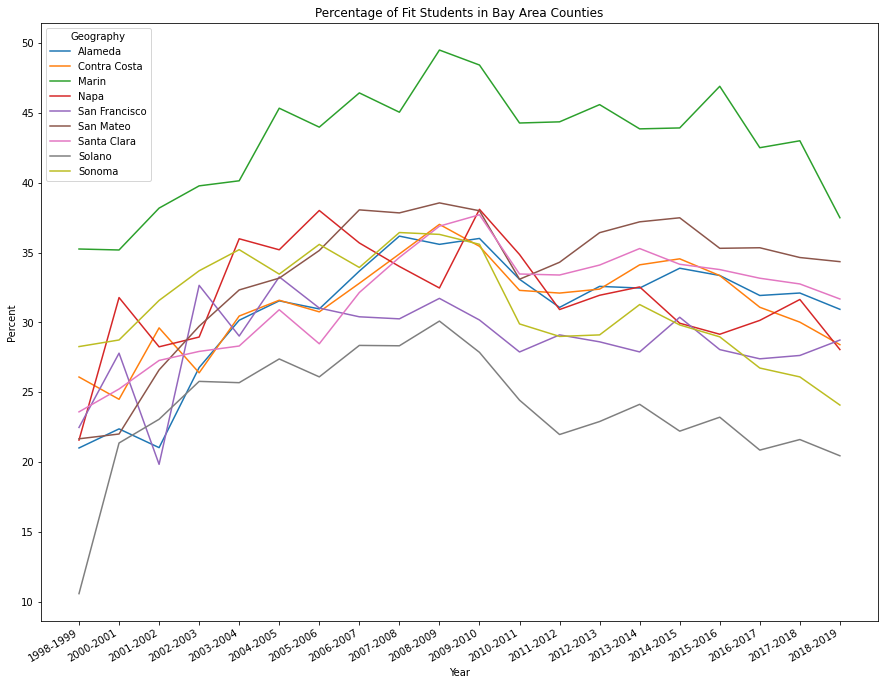

In [299]:
bay = fit_students[fit_students['Geography'].isin(bay_counties)]
fig, ax = plt.subplots(figsize=(15, 11))
sns.lineplot(data=bay, x='Year', y='Percent', hue='Geography')
plt.title('Percentage of Fit Students in Bay Area Counties')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

In [300]:
fit_bay_students_average_per_year = bay.groupby('Year', as_index=False).median('Percent')
fit_bay_students_average_per_year

,Year,Percent,Error
0,1998-1999,22.470000,0.553333
1,2000-2001,25.223333,0.583333
2,2001-2002,27.270000,0.596667
3,2002-2003,28.946667,0.603333
4,2003-2004,30.450000,0.603333
5,2004-2005,33.166667,0.623333
6,2005-2006,31.023333,0.616667
7,2006-2007,33.670000,0.646667
8,2007-2008,34.896667,0.643333
9,2008-2009,36.300000,0.676667


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

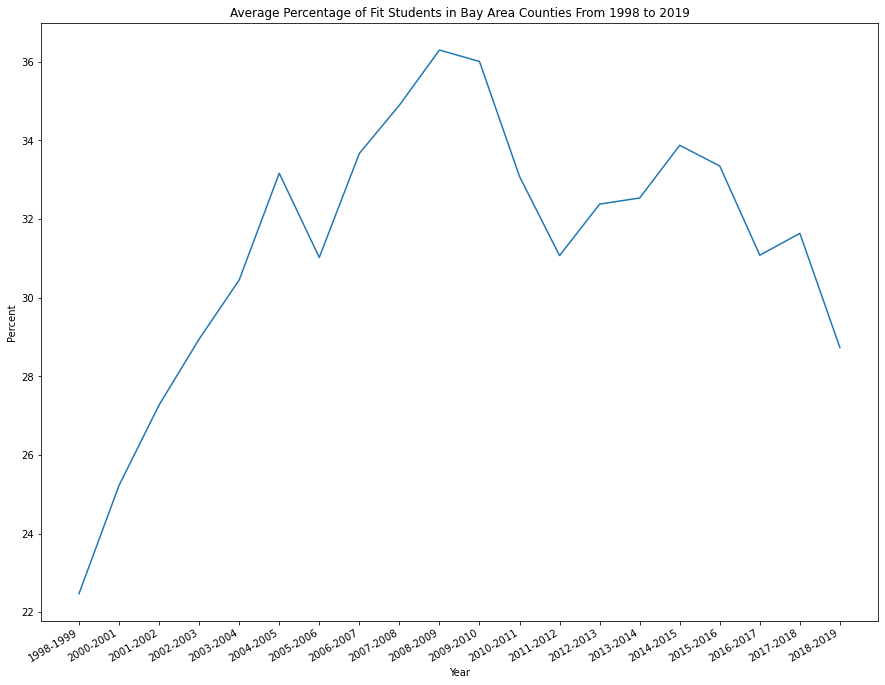

In [301]:
fig, ax = plt.subplots(figsize=(15, 11))
sns.lineplot(data=fit_bay_students_average_per_year, x='Year', y='Percent')
plt.title('Average Percentage of Fit Students in Bay Area Counties From 1998 to 2019')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

In [302]:
health_index

,Latitude,Longitude,Totalenrollment,Asthmaer Rate,Bipoc Over90,Ca Av Asthmaer Rate,Ca Av Chronicabsenteeismrate,Ca Av Diabetes Crudeprev,Ca Av Hosp Mentalhealth,Ca Av Hpi Index,...,Percentfrpl Quartile,Percentfrpl,Percenthomeless,Percentnonwhite,School,Schools In County,Schools In District,Suspensionratetotal,Urban,vehicle_access
0,34.033860,-118.18582,14965,56.8,1.0,54.599998,32.099998,10.4,4.7,47.900002,...,6,75.900001526,0.699999988,90.900001526,City of Angels,2005,938,0,urban,12.0
1,38.609400,-121.34676,6696,61.1,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,4,50.700000763,3.200000048,49.900001526,Visions In Education,346,69,0,urban,2.3
2,34.261787,-118.52343,5675,27.9,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,4,50.700000763,0.300000012,72.300003052,Granada Hills Charter,2005,938,0.3,urban,6.1
3,36.753917,-119.78923,4733,110.8,1.0,54.599998,32.099998,10.4,4.7,47.900002,...,8,91.599998474,0.300000012,92.5,J. E. Young Academic Center,290,103,0.4,urban,14.5
4,33.954072,-117.56779,4580,31.8,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,4,58,0.200000003,83.099998474,Eleanor Roosevelt High,454,50,2.8,urban,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,39.534341,-123.45338,101,44.3,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,6,66.300003052,0,21.100000381,Sherwood,37,7,0,rural,5.8
8575,33.347369,-117.23808,100,24.7,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,6,82,1,87.300003052,Ivy High (Continuation),670,2,2.7,urban,0.8
8576,34.299866,-118.83203,100,29.7,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,2,11,0,36.900001526,The High School at Moorpark College,187,10,3.9,urban,3.3
8577,34.643112,-120.45905,100,49.6,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,6,75,7,74.5,Mission Valley,100,16,0,urban,12.2


In [303]:
health_index.columns

Index(['Latitude', 'Longitude', 'Totalenrollment', 'Asthmaer Rate',
       'Bipoc Over90', 'Ca Av Asthmaer Rate', 'Ca Av Chronicabsenteeismrate',
       'Ca Av Diabetes Crudeprev', 'Ca Av Hosp Mentalhealth',
       'Ca Av Hpi Index', 'Ca Av Pct Poverty Under18', 'Ca Av Pct Teenbirth',
       'Ca Av Pct Uninsured Under19', 'Ca Av Percentel', 'Ca Av Percentfoster',
       'Ca Av Percentfrpl', 'Ca Av Percenthomeless',
       'Ca Av Suspensionratetotal', 'ca_av_hpsa_enc',
       'ca_av_percent_fullyvacc', 'ca_av_vehicle_access', 'Charter',
       'Chronicabsenteeismrate', 'County Need Ratio', 'County',
       'Cumulativeenrollment', 'Diabetes Crudeprev', 'District Need Ratio',
       'District', 'Eilname', 'Elenrollment', 'Fosterenrollment',
       'Frplenrollment', 'has_sbhc', 'Hn Schools In County',
       'Hn Schools In District', 'Homelessenrollment', 'Hosp Mentalhealth',
       'Hpi Index', 'Hpsa Enc', 'Need Score Quartile', 'Need Score',
       'Need Text', 'Nonwhiteenrollment', 'Pct

In [304]:
health_index = health_index[['Asthmaer Rate', 'County', 'Diabetes Crudeprev', 'has_sbhc', 'Hosp Mentalhealth', 'Hpi Index', 'Hpsa Enc', 'percent_fullyvacc']]

In [305]:
health_index = health_index[health_index['County'].isin(bay_counties)]

In [306]:
health_index_avg = health_index.groupby('County', as_index=False).mean(['Asthmaer Rate', 'Diabetes Crudeprev', 'has_sbhc', 'Hosp Mentalhealth', 'Hpi Index', 'Hpsa Enc', 'percent_fullyvacc'])

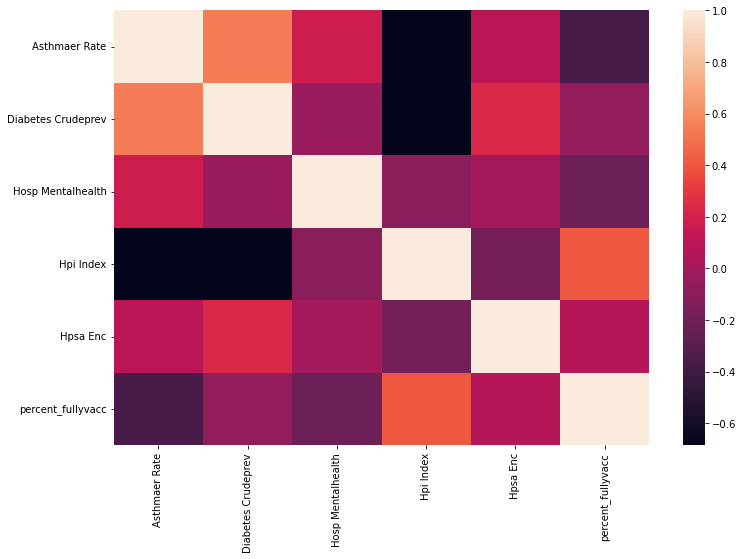

In [307]:
plt.figure(figsize=(12, 8))
sns.heatmap(health_index.corr())
plt.show()

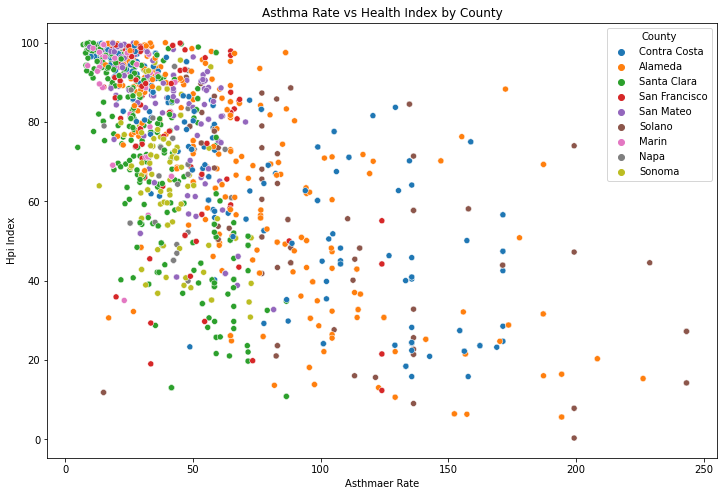

In [320]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data = health_index, x = 'Asthmaer Rate', y = 'Hpi Index', hue = 'County')
plt.title('Asthma Rate vs Health Index by County')
plt.show()

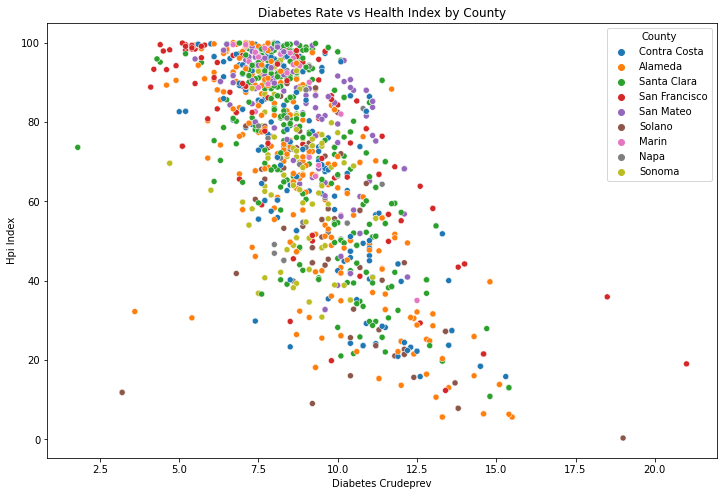

In [321]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=health_index, x = 'Diabetes Crudeprev', y = 'Hpi Index', hue = 'County')
plt.title('Diabetes Rate vs Health Index by County')
plt.show()

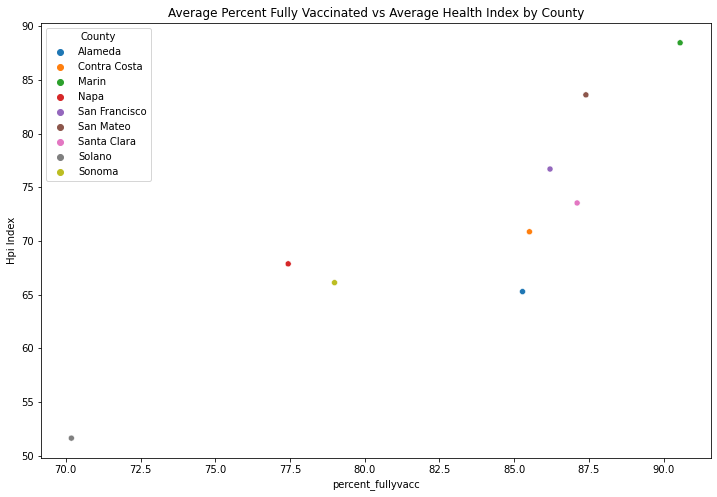

In [322]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=health_index_avg, x = 'percent_fullyvacc', y = 'Hpi Index', hue = 'County')
plt.title('Average Percent Fully Vaccinated vs Average Health Index by County')
plt.show()